## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
def try_model(name_tag):
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = name_tag
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    return results

    

In [24]:
## 超參數設定
from keras.regularizers import l2 
from keras.layers import Dropout
from keras.layers import BatchNormalization

LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 128
MOMENTUM = 0.95

output_units=10
num_neurons=[512, 256, 128]
input_shape = x_train.shape[1:]

In [25]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""


#dropout 
drp_ratio=0.25
input_layer = keras.layers.Input(input_shape)
for i, n_units in enumerate(num_neurons):
    if i == 0:
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1))(input_layer)
        x = Dropout(drp_ratio)(x)
    else :
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1))(x)
        x = Dropout(drp_ratio)(x)

out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
model = keras.models.Model(inputs=[input_layer], outputs=[out])
print(model.summary())
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
try_model('dropout-0.25')



                               
#batch-normalization+input 

input_layer = keras.layers.Input(input_shape)
x = BatchNormalization()(input_layer)
for i, n_units in enumerate(num_neurons):
    x = keras.layers.Dense(units=n_units, 
                           activation="relu", 
                           name="hidden_layer"+str(i+1))(x)
    x = BatchNormalization()(x)

out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
model = keras.models.Model(inputs=[input_layer], outputs=[out])
print(model.summary())
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
try_model('batch-normalization+input')

#batch-normalization+only input 
input_layer = keras.layers.Input(input_shape)
x = BatchNormalization()(x)
for i, n_units in enumerate(num_neurons):
    if i == 0:
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1))(input_layer)
    else:
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1))(x)

out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
model = keras.models.Model(inputs=[input_layer], outputs=[out])
print(model.summary())
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
try_model('batch-normalization+only input')



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0   

Epoch 4/30
50000/50000 [==============================] - 9s 179us/step - loss: 1.1868 - accuracy: 0.5754 - val_loss: 1.3292 - val_accuracy: 0.5311
Epoch 5/30
50000/50000 [==============================] - 9s 179us/step - loss: 1.1085 - accuracy: 0.6069 - val_loss: 1.3029 - val_accuracy: 0.5456
Epoch 6/30
50000/50000 [==============================] - 9s 179us/step - loss: 1.0373 - accuracy: 0.6320 - val_loss: 1.3105 - val_accuracy: 0.5463
Epoch 7/30
50000/50000 [==============================] - 9s 181us/step - loss: 0.9739 - accuracy: 0.6564 - val_loss: 1.3162 - val_accuracy: 0.5468
Epoch 8/30
50000/50000 [==============================] - 9s 179us/step - loss: 0.9014 - accuracy: 0.6799 - val_loss: 1.3499 - val_accuracy: 0.5414
Epoch 9/30
50000/50000 [==============================] - 9s 179us/step - loss: 0.8259 - accuracy: 0.7104 - val_loss: 1.3664 - val_accuracy: 0.5488
Epoch 10/30
50000/50000 [==============================] - 9s 180us/step - loss: 0.7673 - accuracy: 0.7280 - val

50000/50000 [==============================] - 4s 89us/step - loss: 1.0796 - accuracy: 0.6120 - val_loss: 1.4080 - val_accuracy: 0.5205
Epoch 23/30
50000/50000 [==============================] - 4s 89us/step - loss: 1.0610 - accuracy: 0.6200 - val_loss: 1.4009 - val_accuracy: 0.5203
Epoch 24/30
50000/50000 [==============================] - 4s 89us/step - loss: 1.0357 - accuracy: 0.6264 - val_loss: 1.4322 - val_accuracy: 0.5185
Epoch 25/30
50000/50000 [==============================] - 4s 89us/step - loss: 1.0235 - accuracy: 0.6329 - val_loss: 1.4435 - val_accuracy: 0.5197
Epoch 26/30
50000/50000 [==============================] - 4s 88us/step - loss: 0.9990 - accuracy: 0.6400 - val_loss: 1.4334 - val_accuracy: 0.5224
Epoch 27/30
50000/50000 [==============================] - 4s 88us/step - loss: 0.9882 - accuracy: 0.6442 - val_loss: 1.5033 - val_accuracy: 0.4958
Epoch 28/30
50000/50000 [==============================] - 4s 89us/step - loss: 0.9667 - accuracy: 0.6536 - val_loss: 1.4618

{'dropout-0.25': {'train-loss': [2.041565407447815,
   1.8885906885147095,
   1.8375295959472657,
   1.8038018459320069,
   1.777920796737671,
   1.7643960514068604,
   1.7351904439544679,
   1.7279499853515625,
   1.7121670538711549,
   1.7050425204086304,
   1.6930449082183838,
   1.6850567066192628,
   1.6739285174942016,
   1.660796791305542,
   1.6518450093841552,
   1.653514959487915,
   1.6511995268630981,
   1.6456521482086182,
   1.635780372657776,
   1.6260298223495484,
   1.628231503829956,
   1.6193352545166015,
   1.6130458841323851,
   1.60794559715271,
   1.6012676710128784,
   1.6044958214950562,
   1.5989419750213623,
   1.593580037612915,
   1.5945496982192993,
   1.5957165697479248],
  'valid-loss': [1.839366831588745,
   1.7425961246490478,
   1.754291598701477,
   1.7568111770629882,
   1.6937770511627197,
   1.6749762897491456,
   1.6773748432159423,
   1.6465694299697875,
   1.6201970497131348,
   1.6188967405319215,
   1.591072932434082,
   1.6078289182662964,
 

In [37]:
#regularizers 

l2_ration=1e-4
input_layer = keras.layers.Input(input_shape)



for i, n_units in enumerate(num_neurons):
    if i == 0:
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1),
                               kernel_regularizer=l2(l2_ration))(input_layer)
    if i != 0:                               
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1),
                               kernel_regularizer=l2(l2_ration))(x)
        

out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
model = keras.models.Model(inputs=[input_layer], outputs=[out])
print(model.summary())
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
try_model('l2-1e-4')

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
None
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s

{'dropout-0.25': {'train-loss': [2.041565407447815,
   1.8885906885147095,
   1.8375295959472657,
   1.8038018459320069,
   1.777920796737671,
   1.7643960514068604,
   1.7351904439544679,
   1.7279499853515625,
   1.7121670538711549,
   1.7050425204086304,
   1.6930449082183838,
   1.6850567066192628,
   1.6739285174942016,
   1.660796791305542,
   1.6518450093841552,
   1.653514959487915,
   1.6511995268630981,
   1.6456521482086182,
   1.635780372657776,
   1.6260298223495484,
   1.628231503829956,
   1.6193352545166015,
   1.6130458841323851,
   1.60794559715271,
   1.6012676710128784,
   1.6044958214950562,
   1.5989419750213623,
   1.593580037612915,
   1.5945496982192993,
   1.5957165697479248],
  'valid-loss': [1.839366831588745,
   1.7425961246490478,
   1.754291598701477,
   1.7568111770629882,
   1.6937770511627197,
   1.6749762897491456,
   1.6773748432159423,
   1.6465694299697875,
   1.6201970497131348,
   1.6188967405319215,
   1.591072932434082,
   1.6078289182662964,
 

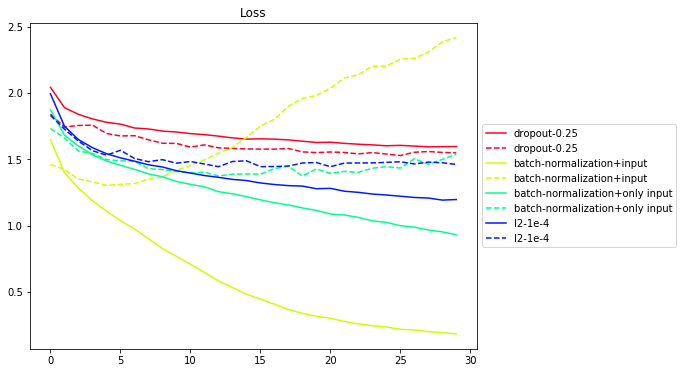

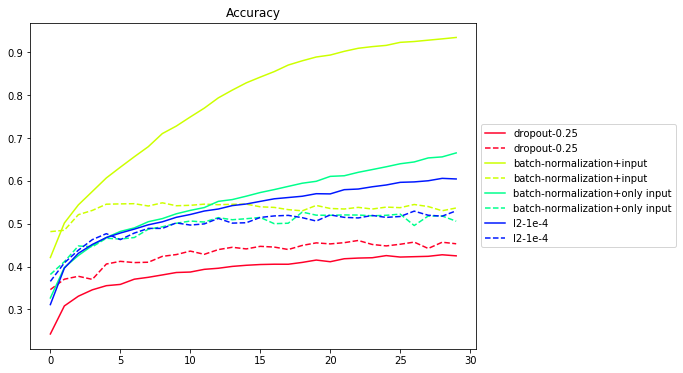

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
